# ENEM Analytics Pro

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import datetime

import warnings 
warnings.filterwarnings('ignore')
from pathlib import Path

pd.options.display.float_format = '{:.2f}'.format

### Bases

In [2]:
base_resultado = '3_bronze/RESULTADOS_2024.csv'
base_participantes = '3_bronze/PARTICIPANTES_2024.csv'

## 1.  Redução de dimensão 

In [3]:
inicio = datetime.datetime.now()

df_resultado = pd.read_csv(base_resultado, encoding='latin1',sep=';')

fim = datetime.datetime.now()
tempo = fim - inicio
print(f"Tempo de leitura: {tempo.total_seconds():.2f} segundos")

Tempo de leitura: 21.81 segundos


In [4]:
inicio = datetime.datetime.now()

df_participante = pd.read_csv(base_participantes, encoding='latin1',sep=';')

fim = datetime.datetime.now()
tempo = fim - inicio
print(f"Tempo de leitura: {tempo.total_seconds():.2f} segundos")

Tempo de leitura: 11.34 segundos


In [5]:
df_resultado.shape

(4332944, 42)

In [6]:
df_resultado.to_parquet(
    path='3_bronze/df_resultado_parquet.parquet.gzip',
    compression='gzip',
    index=False
)

In [7]:
df_participante.to_parquet(
    path='3_bronze/df_participante_parquet.parquet.gzip',
    compression='gzip',
    index=False
)

## 2.Modelagem: Dados de Resultado

In [8]:
inicio = datetime.datetime.now()

arquivo_comprido = '3_bronze/df_resultado_parquet.parquet.gzip'
df_resultado = pd.read_parquet(arquivo_comprido)

fim = datetime.datetime.now()
tempo = fim - inicio
print(f"Tempo de leitura: {tempo.total_seconds():.2f} segundos")

Tempo de leitura: 11.66 segundos


In [9]:
df_resultado.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,206403,2024,23052929.00,2301406.00,Aratuba,23.00,CE,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,80.00,60.00,60.00,80.00,20.00,300.00
1,3604651,2024,42103770.00,4218004.00,Tijucas,42.00,SC,4.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,160.00,200.00,200.00,180.00,180.00,920.00
2,1461268,2024,NaN,NaN,None,NaN,None,NaN,NaN,NaN,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,120.00,40.00,120.00,80.00,480.00
3,4301058,2024,NaN,NaN,None,NaN,None,NaN,NaN,NaN,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,140.00,200.00,160.00,160.00,80.00,740.00
4,3148322,2024,21150354.00,2100436.00,Alto Alegre do Maranhão,21.00,MA,2.00,1.00,1.00,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fitrar a cidade de Uberlândia - MG

In [10]:
estado = 'MG'
cidade = 'Uberlândia'

filtro_cidade = (
    df_resultado.loc[
        (df_resultado['NO_MUNICIPIO_ESC'] == cidade) &
        (df_resultado['SG_UF_ESC'] == estado)
        ]
)

df_resultado.shape, filtro_cidade.shape

((4332944, 42), (4737, 42))

In [11]:
print(type(filtro_cidade))

<class 'pandas.core.frame.DataFrame'>


In [12]:
filtro_cidade.reset_index(drop=True, inplace=True)
filtro_cidade.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,519815,2024,31382507.00,3170206.00,Uberlândia,31.00,MG,4.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,140.00,140.00,100.00,660.00
1,2347679,2024,31369969.00,3170206.00,Uberlândia,31.00,MG,4.00,1.00,1.00,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,160.00,200.00,160.00,200.00,200.00,920.00
2,420695,2024,31167541.00,3170206.00,Uberlândia,31.00,MG,2.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,None,1.00,140.00,100.00,80.00,100.00,60.00,480.00
3,2026118,2024,31166553.00,3170206.00,Uberlândia,31.00,MG,1.00,2.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,160.00,180.00,140.00,200.00,200.00,880.00
4,2176786,2024,31167339.00,3170206.00,Uberlândia,31.00,MG,2.00,1.00,1.00,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,200.00,160.00,160.00,160.00,800.00


In [13]:
filtro_cidade.isnull().sum()/filtro_cidade.shape[0] * 100

NU_SEQUENCIAL             0.00
NU_ANO                    0.00
CO_ESCOLA                 0.00
CO_MUNICIPIO_ESC          0.00
NO_MUNICIPIO_ESC          0.00
CO_UF_ESC                 0.00
SG_UF_ESC                 0.00
TP_DEPENDENCIA_ADM_ESC    0.00
TP_LOCALIZACAO_ESC        0.00
TP_SIT_FUNC_ESC           0.00
CO_MUNICIPIO_PROVA        0.00
NO_MUNICIPIO_PROVA        0.00
CO_UF_PROVA               0.00
SG_UF_PROVA               0.00
TP_PRESENCA_CN            0.00
TP_PRESENCA_CH            0.00
TP_PRESENCA_LC            0.00
TP_PRESENCA_MT            0.00
CO_PROVA_CN              15.64
CO_PROVA_CH              12.86
CO_PROVA_LC              12.86
CO_PROVA_MT              15.64
NU_NOTA_CN               15.64
NU_NOTA_CH               12.86
NU_NOTA_LC               12.86
NU_NOTA_MT               15.64
TX_RESPOSTAS_CN          15.64
TX_RESPOSTAS_CH          12.86
TX_RESPOSTAS_LC          12.86
TX_RESPOSTAS_MT          15.64
TP_LINGUA                 0.00
TX_GABARITO_CN           15.64
TX_GABAR

In [14]:
filtro_cidade.nunique()

NU_SEQUENCIAL             4737
NU_ANO                       1
CO_ESCOLA                   56
CO_MUNICIPIO_ESC             1
NO_MUNICIPIO_ESC             1
CO_UF_ESC                    1
SG_UF_ESC                    1
TP_DEPENDENCIA_ADM_ESC       3
TP_LOCALIZACAO_ESC           2
TP_SIT_FUNC_ESC              1
CO_MUNICIPIO_PROVA          24
NO_MUNICIPIO_PROVA          24
CO_UF_PROVA                  7
SG_UF_PROVA                  7
TP_PRESENCA_CN               3
TP_PRESENCA_CH               3
TP_PRESENCA_LC               3
TP_PRESENCA_MT               3
CO_PROVA_CN                  8
CO_PROVA_CH                  8
CO_PROVA_LC                  8
CO_PROVA_MT                  8
NU_NOTA_CN                2212
NU_NOTA_CH                2330
NU_NOTA_LC                1895
NU_NOTA_MT                2525
TX_RESPOSTAS_CN           3996
TX_RESPOSTAS_CH           4124
TX_RESPOSTAS_LC           4127
TX_RESPOSTAS_MT           3996
TP_LINGUA                    2
TX_GABARITO_CN               5
TX_GABAR

In [15]:
[loop for loop in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
print(type(filtro_cidade))

<class 'pandas.core.frame.DataFrame'>


In [17]:
filtro_cidade.columns

Index(['NU_SEQUENCIAL', 'NU_ANO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [18]:
filtro_cidade.columns = [Loop.lower() for Loop in filtro_cidade.columns]

In [19]:
filtro_cidade.columns

Index(['nu_sequencial', 'nu_ano', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc', 'tp_dependencia_adm_esc',
       'tp_localizacao_esc', 'tp_sit_func_esc', 'co_municipio_prova',
       'no_municipio_prova', 'co_uf_prova', 'sg_uf_prova', 'tp_presenca_cn',
       'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'co_prova_cn',
       'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'tp_lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt',
       'tp_status_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3',
       'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao'],
      dtype='object')

#### De Para

In [20]:
dicionario_adm_escola = {
      1:'Federal',
      2:'Estadual',
      3:'Municipal',
      4:'Privada'
}

dicionario_localizacao_escola = {
    1:'Urbana',
    2:'Rural'
}

dicionario_status_redacao = {
    1:'1_sem_problemas',
    2:'2_anulada',
    3:'3_copia_texto_motivador',
    4:'4_em_branco',
    6:'5_fuga_ao_tema',
    7:'6_nao_atendimento_tipo_textual',
    8:'7_texto_insuficiente',
    9:'8_parte_desconectada'
}

filtro_cidade['tipo_adm_escola'] = filtro_cidade.tp_dependencia_adm_esc.map(dicionario_adm_escola)
filtro_cidade['tipo_local_escola'] = filtro_cidade.tp_localizacao_esc.map(dicionario_localizacao_escola)
filtro_cidade['status_redacao'] = filtro_cidade.tp_status_redacao.map(dicionario_status_redacao)

filtro_cidade['idioma_estrangeiro'] = np.where(filtro_cidade.tp_lingua == 0, 'Inglês', 'Espanhol')

filtro_cidade.iloc[0:5, -5:]

,nu_nota_redacao,tipo_adm_escola,tipo_local_escola,status_redacao,idioma_estrangeiro
0,660.00,Privada,Urbana,1_sem_problemas,Inglês
1,920.00,Privada,Urbana,1_sem_problemas,Inglês
2,480.00,Estadual,Urbana,1_sem_problemas,Inglês
3,880.00,Federal,Rural,1_sem_problemas,Espanhol
4,800.00,Estadual,Urbana,1_sem_problemas,Inglês


In [21]:
filtro_cidade.tipo_adm_escola.value_counts()

tipo_adm_escola
Estadual    3371
Privada     1116
Federal      250
Name: count, dtype: int64

In [22]:
filtro_cidade.tipo_local_escola.value_counts()

tipo_local_escola
Urbana    4583
Rural      154
Name: count, dtype: int64

In [23]:
filtro_cidade.status_redacao.value_counts().sort_index()

status_redacao
1_sem_problemas                   4036
2_anulada                            5
3_copia_texto_motivador              7
4_em_branco                         53
5_fuga_ao_tema                      17
6_nao_atendimento_tipo_textual       1
7_texto_insuficiente                 9
Name: count, dtype: int64

In [24]:
filtro_cidade.columns

Index(['nu_sequencial', 'nu_ano', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc', 'tp_dependencia_adm_esc',
       'tp_localizacao_esc', 'tp_sit_func_esc', 'co_municipio_prova',
       'no_municipio_prova', 'co_uf_prova', 'sg_uf_prova', 'tp_presenca_cn',
       'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'co_prova_cn',
       'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'tp_lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt',
       'tp_status_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3',
       'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao', 'tipo_adm_escola',
       'tipo_local_escola', 'status_redacao', 'idioma_estrangeiro'],
      dtype='object')

In [25]:
filtro_cidade.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nu_sequencial,4737.00,2150797.60,1157058.64,471.00,1185617.00,2278610.00,3093643.00,4311674.00
nu_ano,4737.00,2024.00,0.00,2024.00,2024.00,2024.00,2024.00,2024.00
co_escola,4737.00,31219274.32,729236.96,31009107.00,31167339.00,31167584.00,31167843.00,60013108.00
co_municipio_esc,4737.00,3170206.00,0.00,3170206.00,3170206.00,3170206.00,3170206.00,3170206.00
co_uf_esc,4737.00,31.00,0.00,31.00,31.00,31.00,31.00,31.00
tp_dependencia_adm_esc,4737.00,2.42,0.91,1.00,2.00,2.00,2.00,4.00
tp_localizacao_esc,4737.00,1.03,0.18,1.00,1.00,1.00,1.00,2.00
tp_sit_func_esc,4737.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
co_municipio_prova,4737.00,3173485.48,99118.60,1702109.00,3170206.00,3170206.00,3170206.00,5221601.00
co_uf_prova,4737.00,31.04,1.01,17.00,31.00,31.00,31.00,52.00


In [26]:
filtro_cidade.idioma_estrangeiro.value_counts(normalize = True) * 100

idioma_estrangeiro
Inglês     71.94
Espanhol   28.06
Name: proportion, dtype: float64

#### Separar o dataset

In [27]:
colunas_notas = ['nu_nota_cn', 'nu_nota_ch','nu_nota_lc','nu_nota_mt','nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn','tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt','status_redacao']
colunas_categoricas = ['no_municipio_esc','sg_uf_esc','tipo_adm_escola','tipo_local_escola','idioma_estrangeiro']

colunas_para_filtrar = colunas_categoricas + colunas_presenca + colunas_notas
filtro_cidade[colunas_para_filtrar]

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,514.50,602.60,588.70,443.90,660.00
1,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,593.40,684.50,656.40,677.80,920.00
2,Uberlândia,MG,Estadual,Urbana,Inglês,0,1,1,0,1_sem_problemas,NaN,486.60,461.90,NaN,480.00
3,Uberlândia,MG,Federal,Rural,Espanhol,1,1,1,1,1_sem_problemas,532.50,434.80,549.60,497.40,880.00
4,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,574.80,556.20,478.60,621.50,800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,563.40,537.60,525.40,703.60,920.00
4733,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,453.70,393.70,467.40,445.20,620.00
4734,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,604.20,611.80,584.60,685.90,900.00
4735,Uberlândia,MG,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,427.30,480.90,548.90,474.00,660.00


In [29]:
#base_dir = Path.cwd()

#prata_dir = '2_prata'
#prata_dir.mkdir(parents=True, exist_ok=True)

arquivo_saida = '2_prata/dados_uberlandia_notas.parquet.gzip'

filtro_cidade[colunas_para_filtrar].to_parquet(
    path=arquivo_saida,
    compression='gzip',
    index=False
)

print(f"Arquivo salvo em: {arquivo_saida}")


Arquivo salvo em: 2_prata/dados_uberlandia_notas.parquet.gzip


## 2 - Análise Exploratória

In [30]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [31]:
df_modelado = pd.read_parquet(arquivo_saida)
df_modelado.head()

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,514.50,602.60,588.70,443.90,660.00
1,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,593.40,684.50,656.40,677.80,920.00
2,Uberlândia,MG,Estadual,Urbana,Inglês,0,1,1,0,1_sem_problemas,NaN,486.60,461.90,NaN,480.00
3,Uberlândia,MG,Federal,Rural,Espanhol,1,1,1,1,1_sem_problemas,532.50,434.80,549.60,497.40,880.00
4,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,574.80,556.20,478.60,621.50,800.00


In [32]:
df_modelado.shape

(4737, 15)

In [33]:
df_modelado.describe(include='all').transpose().fillna('')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_municipio_esc,4737.00,1,Uberlândia,4737,,,,,,,
sg_uf_esc,4737.00,1,MG,4737,,,,,,,
tipo_adm_escola,4737.00,3,Estadual,3371,,,,,,,
tipo_local_escola,4737.00,2,Urbana,4583,,,,,,,
idioma_estrangeiro,4737.00,2,Inglês,3408,,,,,,,
tp_presenca_cn,4737.00,,,,0.84,0.36,0.00,1.00,1.00,1.00,2.00
tp_presenca_ch,4737.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
tp_presenca_lc,4737.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
tp_presenca_mt,4737.00,,,,0.84,0.36,0.00,1.00,1.00,1.00,2.00
status_redacao,4128.00,7,1_sem_problemas,4036,,,,,,,


In [34]:
colunas_notas = ['nu_nota_cn', 'nu_nota_ch','nu_nota_lc','nu_nota_mt','nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn','tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt']

#### Situação de presença na prova
- 0 : Faltou à prova
- 1 : Presença na prova
- 2 : Candidato eliminado

In [35]:
tabela_presenca = {}

for coluna in colunas_presenca:
    proporsao = df_modelado[coluna].value_counts(normalize=True)
    tabela_presenca[coluna] = proporsao

tabela_presenca = pd.DataFrame(tabela_presenca).fillna(0)
tabela_presenca

,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt
1,0.84,0.87,0.87,0.84
0,0.16,0.13,0.13,0.16
2,0.00,0.00,0.00,0.00


#### Média geral de presença

In [36]:
tabela_presenca.mean(axis=1) * 100

1   85.75
0   14.18
2    0.07
dtype: float64

#### Análise das notas

In [37]:
df_modelado[colunas_notas]

,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,514.50,602.60,588.70,443.90,660.00
1,593.40,684.50,656.40,677.80,920.00
2,NaN,486.60,461.90,NaN,480.00
3,532.50,434.80,549.60,497.40,880.00
4,574.80,556.20,478.60,621.50,800.00
...,...,...,...,...,...
4732,563.40,537.60,525.40,703.60,920.00
4733,453.70,393.70,467.40,445.20,620.00
4734,604.20,611.80,584.60,685.90,900.00
4735,427.30,480.90,548.90,474.00,660.00


Text(0.5, 0, 'Área do Conhecimento')

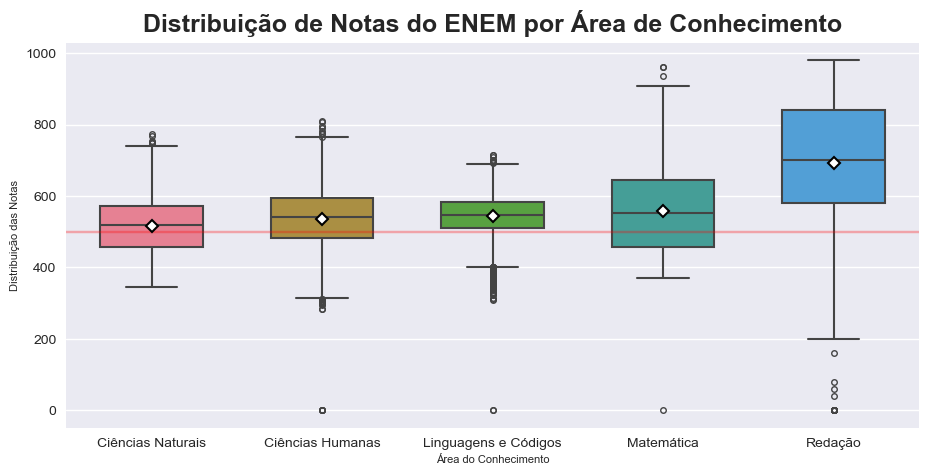

In [39]:
analise_notas = (
    df_modelado[colunas_notas].melt(var_name='prova',value_name='nota')
)

nomes_prova = {
    'nu_nota_cn' : 'Ciências Naturais',
    'nu_nota_ch' : 'Ciências Humanas',
    'nu_nota_lc' : 'Linguagens e Códigos',
    'nu_nota_mt' : 'Matemática',
    'nu_nota_redacao' : 'Redação' 
}
analise_notas['prova'] = analise_notas['prova'].map(nomes_prova)


order_boxplot = (
    analise_notas.groupby(by='prova').agg(mediana=('nota','median')).sort_values(by='mediana').index
)

plt.figure(figsize=(11,5))
plt.title('Distribuição de Notas do ENEM por Área de Conhecimento', fontsize=18,fontweight='bold',pad=8)


sns.boxplot(
    data=analise_notas,
    x='prova',
    y='nota',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue='prova',
    legend=False,
    order=order_boxplot,
    showmeans=True,
    meanprops={
        'marker': 'D',
        'markerfacecolor': 'white',
        'markeredgecolor' : 'black',
        'markersize': '6',
        'markeredgewidth': 1.5
    }
)

plt.axhline(y=500, color='red',linestyle='-',alpha=0.3, label='Nota 500')

plt.ylabel('Distribuição das Notas',size=8)
plt.xlabel('Área do Conhecimento', size=8)

#### Análise das notas:
- A área de Linguagens e Códigos possui a menor dispersão, devido a "caixa" do box-plot está mais condesado;
- As maiores notas obtidas estão na Redação, mas também é a área do conhecimento com maior dispersão;
- A área do conhecimento de pior perfomance foi a de Ciências Naturais.

In [40]:
pd.qcut(
    df_modelado.nu_nota_cn,
    q=4,
    labels=['Q1','Q2','Q3','Q4']
).value_counts()

nu_nota_cn
Q1    1001
Q4     999
Q2     998
Q3     998
Name: count, dtype: int64

In [41]:
for col in colunas_notas:
    print(col)

nu_nota_cn
nu_nota_ch
nu_nota_lc
nu_nota_mt
nu_nota_redacao


In [42]:
for coluna in colunas_notas:
    df_modelado[coluna+'_decil'] = pd.qcut(
        df_modelado[coluna],
        q=10,
        labels = ['D'+str(loop) for loop in range(1,11)]
    )

df_modelado.sample(5)

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,nu_nota_cn_decil,nu_nota_ch_decil,nu_nota_lc_decil,nu_nota_mt_decil,nu_nota_redacao_decil
2418,Uberlândia,MG,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,453.50,562.60,506.30,378.50,640.00,D3,D6,D3,D1,D4
552,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,488.70,548.60,571.00,641.20,760.00,D4,D6,D7,D8,D6
53,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,545.80,473.60,532.70,549.40,740.00,D7,D3,D5,D5,D6
350,Uberlândia,MG,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,530.80,582.20,619.50,705.00,840.00,D6,D7,D10,D9,D8
4618,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,599.80,593.70,579.70,681.00,760.00,D9,D8,D8,D9,D6


#### Agrupamento das notas de matemática e ciências naturais

In [43]:
df_modelado.groupby(['nu_nota_cn_decil','nu_nota_mt_decil']).size().unstack()

nu_nota_mt_decil,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
nu_nota_cn_decil,,,,,,,,,,
D1,97,89,75,52,45,22,11,5,3,1
D2,85,87,67,49,50,38,9,11,4,1
D3,69,74,59,69,41,25,40,11,7,3
D4,54,55,56,51,54,49,39,30,11,3
D5,40,43,42,55,59,53,50,31,18,7
D6,24,24,50,56,46,68,50,45,31,5
D7,19,18,32,32,44,59,75,55,54,13
D8,10,7,11,27,35,51,64,83,80,30
D9,2,3,6,8,23,29,51,99,104,75


In [44]:
df_modelado.groupby(['nu_nota_ch_decil','nu_nota_lc_decil']).size().unstack()

nu_nota_lc_decil,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
nu_nota_ch_decil,,,,,,,,,,
D1,211,82,48,35,17,11,4,2,3,0
D2,113,107,82,42,36,18,9,3,2,1
D3,43,100,81,71,59,23,29,4,2,1
D4,22,61,84,83,66,51,27,8,9,1
D5,12,29,64,63,82,66,46,32,17,2
D6,8,19,28,54,54,84,79,55,30,3
D7,1,6,15,34,63,70,90,64,50,18
D8,2,5,11,14,25,53,75,118,80,30
D9,1,3,0,17,10,32,52,83,116,99


Text(97.72222222222221, 0.5, 'Decil - Ciências da Natureza')

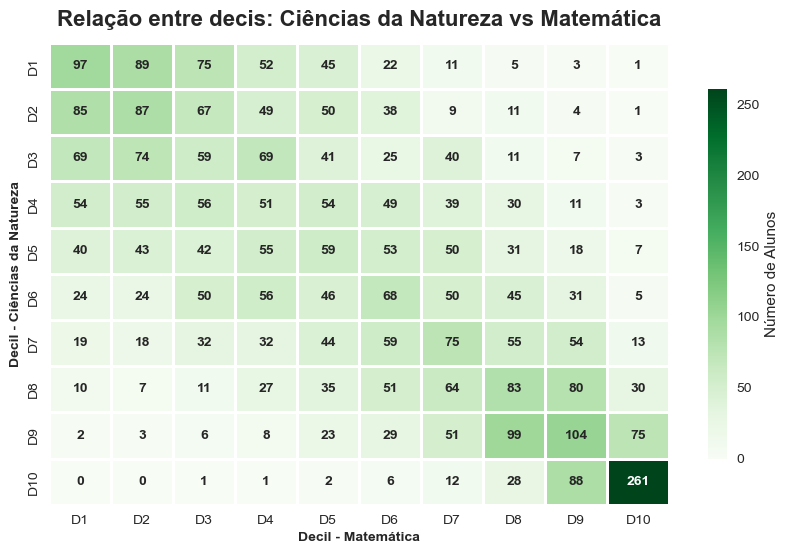

In [45]:
movimento = (
    df_modelado
    .groupby(['nu_nota_cn_decil', 'nu_nota_mt_decil'])
    .size()
    .unstack()
)

plt.figure(figsize=(10, 6))
plt.title('Relação entre decis: Ciências da Natureza vs Matemática', fontsize=16, fontweight='bold',pad=12)

ax = sns.heatmap(
    movimento,
    annot=True,
    fmt='d',
    cmap='Greens',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Número de Alunos', 'shrink': 0.8},
    annot_kws={'size': 10, 'weight':'bold'},
)

plt.xlabel('Decil - Matemática', fontsize=10, fontweight='bold')
plt.ylabel('Decil - Ciências da Natureza', fontsize=10, fontweight='bold')

Text(97.72222222222221, 0.5, 'Decil - Ciências Humanas')

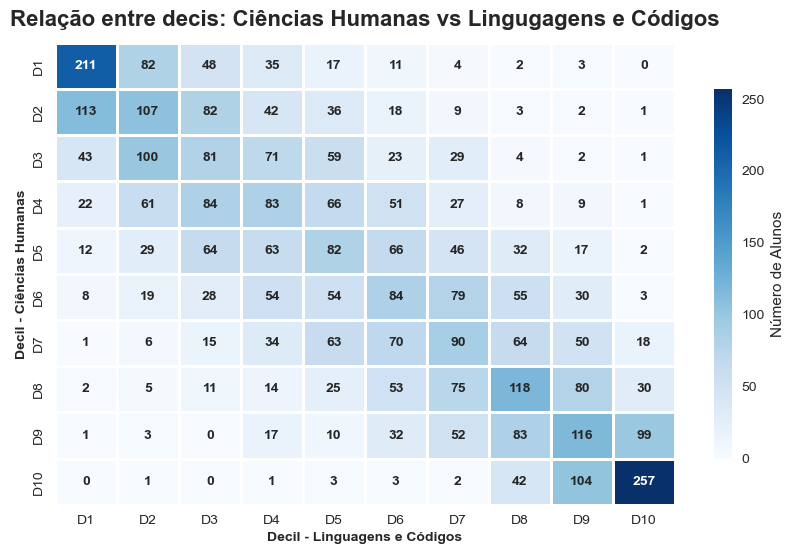

In [46]:
movimento = (
    df_modelado
    .groupby(['nu_nota_ch_decil','nu_nota_lc_decil'])
    .size()
    .unstack()
)

plt.figure(figsize=(10, 6))
plt.title('Relação entre decis: Ciências Humanas vs Lingugagens e Códigos', fontsize=16, fontweight='bold',pad=12)

ax = sns.heatmap(
    movimento,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Número de Alunos', 'shrink': 0.8},
    annot_kws={'size': 10, 'weight':'bold'},
)

plt.xlabel('Decil - Linguagens e Códigos', fontsize=10, fontweight='bold')
plt.ylabel('Decil - Ciências Humanas', fontsize=10, fontweight='bold')

Text(97.72222222222221, 0.5, 'Decil - Redação')

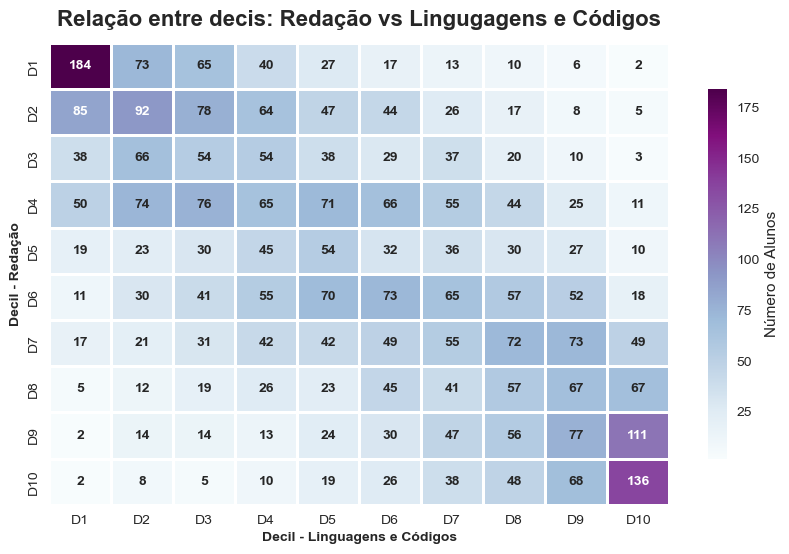

In [47]:
movimento = (
    df_modelado
    .groupby(['nu_nota_redacao_decil','nu_nota_lc_decil'])
    .size()
    .unstack()
)

plt.figure(figsize=(10, 6))
plt.title('Relação entre decis: Redação vs Lingugagens e Códigos', fontsize=16, fontweight='bold',pad=12)

ax = sns.heatmap(
    movimento,
    annot=True,
    fmt='d',
    cmap='BuPu',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Número de Alunos', 'shrink': 0.8},
    annot_kws={'size': 10, 'weight':'bold'},
)

plt.xlabel('Decil - Linguagens e Códigos', fontsize=10, fontweight='bold')
plt.ylabel('Decil - Redação', fontsize=10, fontweight='bold')

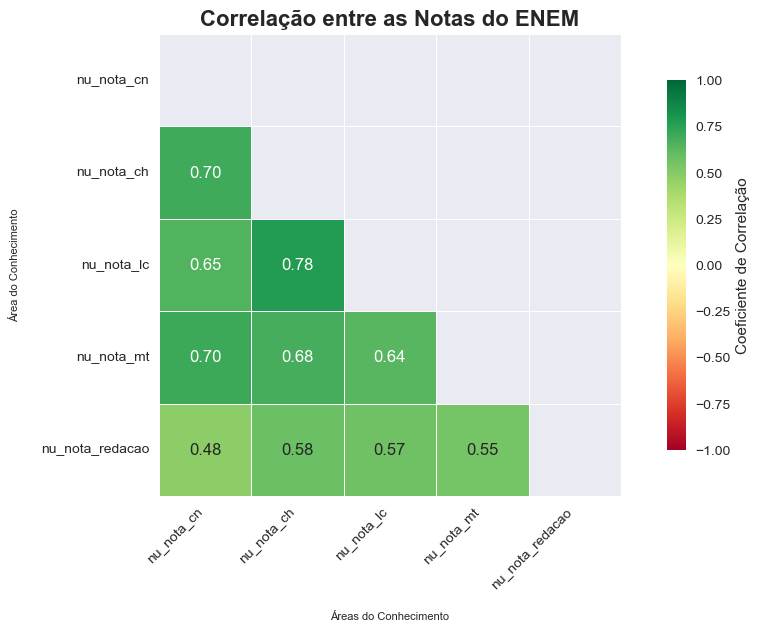

In [48]:
plt.figure(figsize=(12,6))

plt.title(
    "Correlação entre as Notas do ENEM",
    fontsize=16,
    fontweight='bold'
)

mask = np.triu(np.ones_like(df_modelado[colunas_notas].corr(),dtype=bool))

heatmap = sns.heatmap(
    df_modelado[colunas_notas].corr(),
    annot=True,
    cmap='RdYlGn',
    center=0,
    vmin = -1, vmax=1,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Coeficiente de Correlação'},
    fmt='.2f',
    annot_kws={'size': 12},
    mask=mask
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.xlabel('Áreas do Conhecimento',fontsize=8, labelpad=15)
plt.ylabel('Área do Conhecimento',fontsize=8,labelpad=15)

plt.grid(False)

#### Análise das Notas

Text(0.5, 0, 'Área do Conhecimento')

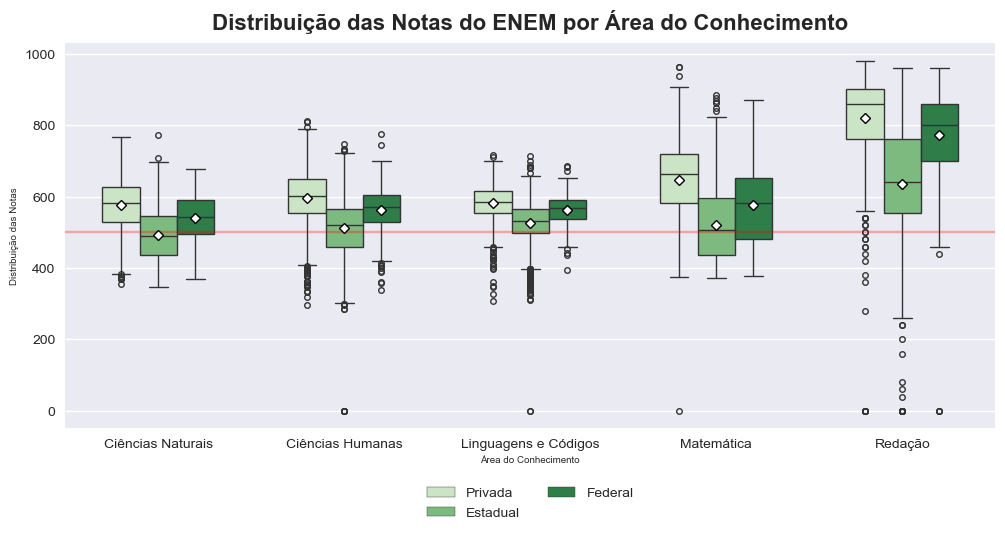

In [49]:
analise_notas = (
    df_modelado[colunas_notas + ['tipo_adm_escola']]
    .melt(id_vars=['tipo_adm_escola'],
        value_vars=colunas_notas,
        var_name='prova',
        value_name='nota')
)

nomes_prova = {
    'nu_nota_cn' : 'Ciências Naturais',
    'nu_nota_ch' : 'Ciências Humanas',
    'nu_nota_lc' : 'Linguagens e Códigos',
    'nu_nota_mt' : 'Matemática',
    'nu_nota_redacao' : 'Redação' 
}
analise_notas['prova'] = analise_notas['prova'].map(nomes_prova)

order_boxplot = (
    analise_notas
    .groupby(by='prova')
    .agg(mediana=('nota','median'))
    .sort_values(by='mediana')
    .index
)

plt.figure(figsize=(12,5))
plt.title('Distribuição das Notas do ENEM por Área do Conhecimento',fontsize=16, fontweight='bold',pad=10)

sns.boxplot(
    data=analise_notas,
    x='prova',
    y='nota',
    width=0.6,
    fliersize=4,
    hue='tipo_adm_escola',
    legend=True,
    order=order_boxplot,
    showmeans=True,
    meanprops={
        'marker': 'D',
        'markerfacecolor':'white',
        'markeredgecolor': 'black',
        'markersize' : '5',
        'markeredgewidth' : 1
    },
    palette='Greens'
)

plt.legend(bbox_to_anchor=(0.5, -0.12),loc='upper center',ncol=2)

plt.axhline(y=500, color='red', linestyle='-', alpha=0.3, label='Nota 500')

plt.ylabel('Distribuição das Notas',size=7)
plt.xlabel('Área do Conhecimento', size=7)

In [50]:
df_comparativo = df_modelado[colunas_notas + ['tipo_adm_escola']]

for coluna in colunas_notas:
    df_comparativo[coluna + '_decil_geral'] = pd.qcut(
        df_comparativo[coluna],
        q=10,
        labels=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10']
    )

df_estadual = df_comparativo[df_comparativo['tipo_adm_escola'] == 'Estadual']
df_federal = df_comparativo[df_comparativo['tipo_adm_escola'] == 'Federal']
df_privada = df_comparativo[df_comparativo['tipo_adm_escola'] == 'Privada']

df_estadual.shape,df_federal.shape,df_privada.shape

((3371, 11), (250, 11), (1116, 11))

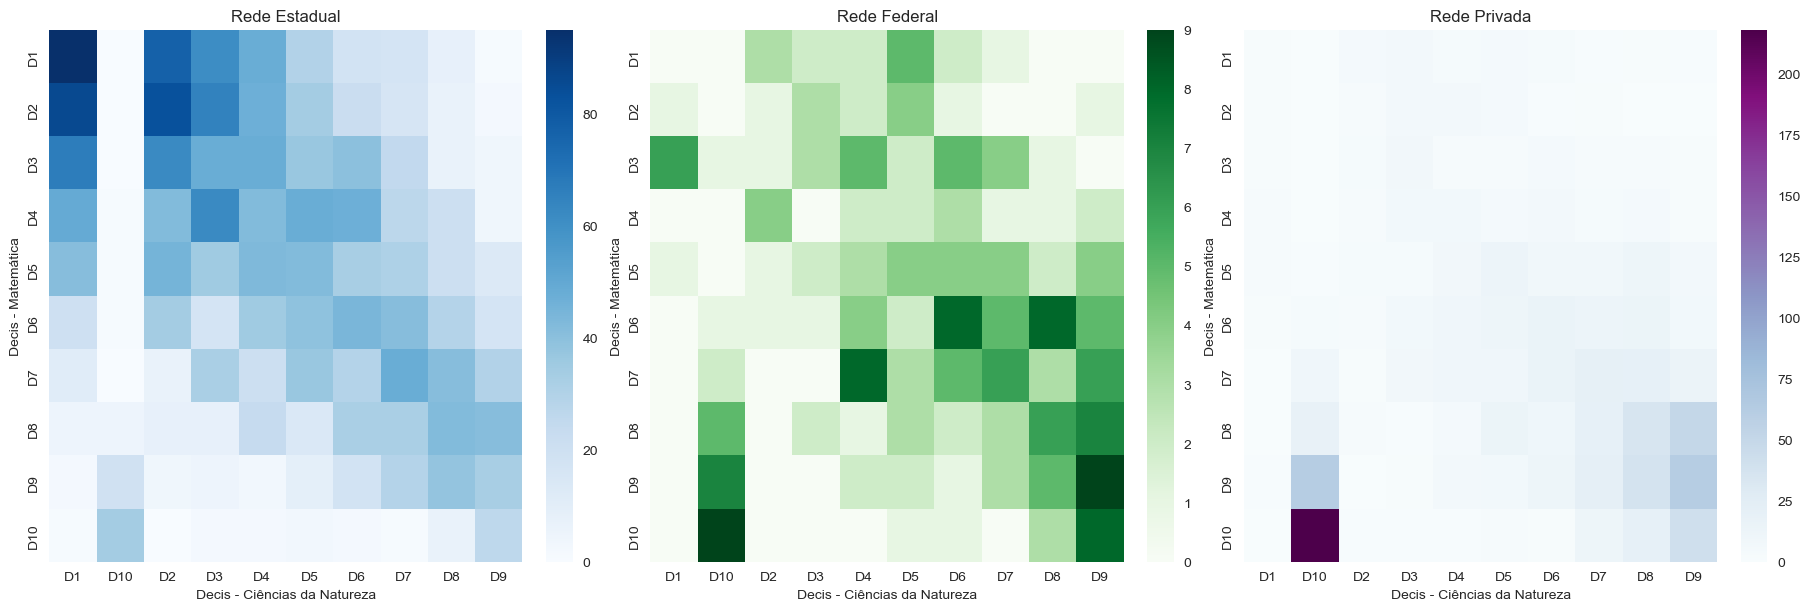

In [51]:
def matriz_mt_x_cn(df):
   
    m = (
        df
        .groupby(['nu_nota_mt_decil_geral', 'nu_nota_cn_decil_geral'])
        .size()
        .unstack('nu_nota_cn_decil_geral')
        .fillna(0)  
    )
    
    try:
        m = m.sort_index().reindex(sorted(m.columns), axis=1)
    except Exception:
        pass
    return m


movimento_estadual = matriz_mt_x_cn(df_estadual)
movimento_federal  = matriz_mt_x_cn(df_federal)
movimento_privada  = matriz_mt_x_cn(df_privada)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# HeatMap Estadual
sns.heatmap(
    movimento_estadual,
    annot=False,    
    cmap='Blues',
    ax=ax1
)
ax1.set_title('Rede Estadual', fontsize=12)
ax1.set_ylabel('Decis - Matemática', fontsize=10)
ax1.set_xlabel('Decis - Ciências da Natureza', fontsize=10)

# HeatMap Federal
sns.heatmap(
    movimento_federal,
    annot=False,
    cmap='Greens',
    ax=ax2
)
ax2.set_title('Rede Federal', fontsize=12)
ax2.set_ylabel('Decis - Matemática', fontsize=10)
ax2.set_xlabel('Decis - Ciências da Natureza', fontsize=10)

# HeatMap Privada
sns.heatmap(
    movimento_privada,
    annot=False,
    cmap='BuPu',
    ax=ax3
)
ax3.set_title('Rede Privada', fontsize=12)
ax3.set_ylabel('Decis - Matemática', fontsize=10)
ax3.set_xlabel('Decis - Ciências da Natureza', fontsize=10)

plt.show()

In [52]:
import plotly.express as px

decis = [f'D{loop}' for loop in range(1,11)]
dados_reais = []

for decil in decis:

    total_decil = len(df_modelado[df_modelado['nu_nota_cn_decil'] == decil])

    publico_decil = len(df_modelado[
        (df_modelado['nu_nota_cn_decil'] == decil) &
        (df_modelado['tipo_adm_escola'] == 'Estadual') |
        (df_modelado['tipo_adm_escola'] == 'Federal')
        ])
    
    privado_decil = len(df_modelado[
        (df_modelado['nu_nota_cn_decil'] == decil) &
        (df_modelado['tipo_adm_escola'] == 'Privada')
        ])
    
    pct_publico = (publico_decil / total_decil * 100) if total_decil > 0 else 0
    pct_privado = (privado_decil / total_decil * 100) if total_decil > 0 else 0

    dados_reais.extend([
        {'decil': decil, 'rede': 'Pública', 'percentual':pct_publico},
        {'decil': decil, 'rede': 'Privada','percentual': pct_privado}
    ])

df_real = pd.DataFrame(dados_reais)
df_real.head()

,decil,rede,percentual
0,D1,Pública,156.75
1,D1,Privada,3.75
2,D2,Pública,152.62
3,D2,Privada,6.98
4,D3,Pública,146.98


In [53]:
analise_funil = px.funnel(
    df_real,
    x='percentual',
    y='decil',
    color='rede',
    title='Distribuição por Decil: Pública vs Privada - Ciências da Natureza',
    width=950,
    height=600,
    color_discrete_map={'Pública': '#72fa80', 'Privada' : '#8072fa'} 
)

analise_funil.update_xaxes(tickformat='.0f')

analise_funil.update_layout(
    legend=dict(
        orientation='h',
        yanchor='top',
        y=0.2,
        xanchor='center',
        x=0.5
    )
)

analise_funil

In [54]:
def perfil_simples(notas_alunos):
    decis = []
    for q in notas_alunos:
        if pd.isna(q):
            decis.append(0)
        else:
            decis.append(int(str(q).replace('D','')))
        
    cn, ch, lc, mt, red = decis

    if mt >=8 and cn >= 7:
        return 'especialista matemática'
    
    if red >= 8 and ch >= 7:
        return 'especialista redação'
    
    if mt >= 7 and cn >= 7 and red >= 7 and ch >= 7:
        return 'bom desempenho'
    
    if mt <= 3 or cn <= 3 or red <= 3:
        return 'melhorar' 
    
    return 'regular'

colunas_decis = ['nu_nota_cn_decil','nu_nota_ch_decil','nu_nota_lc_decil','nu_nota_mt_decil','nu_nota_redacao_decil']
df_modelado['segmentacao_notas'] = df_modelado[colunas_decis].apply(perfil_simples, axis=1)

df_modelado['segmentacao_notas'].value_counts()

segmentacao_notas
melhorar                   2671
especialista matemática     970
regular                     800
especialista redação        282
bom desempenho               14
Name: count, dtype: int64

#### Gráfico de Explosão Solar

In [55]:
grafico = px.sunburst(
    df_modelado,
    path=['tipo_adm_escola','segmentacao_notas'],
    title='Distribuição de Perfis de Desempenho por Rede de Ensino',
    width=850,
    height=700,
    color='tipo_adm_escola',
)

grafico.update_traces(
    textinfo='label+percent parent',
    hovertemplate='<b>%{label}</b><br>Quantidade> %{value}<br>Percentual: %{percentParent}'
)

grafico.update_layout(
    font_size=14,
    title_x=0.5
)

In [56]:
ranking_cursos = {
    '1_MEDICINA':800,
    '2_ENGENHARIA_AEROESPACAL':780,
    '3_DIREITO':770,
    '4_ENGENHARIA_COMPUTACAO':760,
    '5_CIENCIA_COMPUTACAO':740,
    '6_PSICOLOGIA':730,
    '7_NUTRICAO':720,
    '8_ARQUITETURA':700,
    '9_ADMINISTRACAO':690,
    '10_ENFERMAGEM':680
}

df_modelado['media_geral'] = (
    df_modelado['nu_nota_cn'] +
    df_modelado['nu_nota_ch'] +
    df_modelado['nu_nota_lc'] +
    df_modelado['nu_nota_mt'] +
    df_modelado['nu_nota_redacao']
) / 5

def encontrar_melhor_curso(media):
    for curso, nota_corte in sorted(ranking_cursos.items(), key=lambda x: x[1], reverse=True):
        if media >= nota_corte:
            return curso
            
    return 'NENHUM'


In [57]:
df_modelado['curso_atingido'] = df_modelado['media_geral'].apply(encontrar_melhor_curso)

In [58]:
# Exportar pra camada ouro
#base_dir = Path.cwd()

#ouro_dir =  '1_ouro'
#ouro_dir.mkdir(parents=True, exist_ok=True)

arquivo_final =  '1_ouro/dados_notas_segmentado.parquet.gzip'

df_modelado.to_parquet(
    path=arquivo_final,
    compression='gzip',
    index=False
)

## 3 - Análise dos dados tratados

In [59]:
arquivo_participantes = '3_bronze/df_participante_parquet.parquet.gzip'
df_participante = pd.read_parquet(arquivo_participantes)
df_participante.shape

(4332944, 38)

In [60]:
estado = 'MG'
cidade = 'Uberlândia'

filtro_cidade_participante = (
    df_participante.loc[
        (df_participante['NO_MUNICIPIO_PROVA'] == cidade) &
        (df_participante['SG_UF_PROVA'] == estado)
        ]
)

filtro_cidade_participante.shape

(17521, 38)

In [61]:

dicionario_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

dicionario_sexo = {
    'M': 'Masculino',
    'F': 'Feminino'
}

dicionario_estado_civil = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Companheiro(a)',
    3: 'Divorciado(a)/Separado(a)',
    4: 'Viúvo(a)'
}

dicionario_cor_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

dicionario_nacionalidade = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a) nascido(a) no exterior'
}

dicionario_conclusao_em = {
    1: 'Já concluiu o Ensino Médio',
    2: 'Concluirá em 2024',
    3: 'Concluirá após 2024',
    4: 'Não concluiu e não está cursando'
}

dicionario_ano_conclusao = {
    0: 'Não informado',
    1: '2023',
    2: '2022',
    3: '2021',
    4: '2020',
    5: '2019',
    6: '2018',
    7: '2017',
    8: '2016',
    9: '2015',
    10: '2014',
    11: '2013',
    12: '2012',
    13: '2011',
    14: '2010',
    15: '2009',
    16: '2008',
    17: '2007',
    18: 'Antes de 2007'
}

dicionario_tipo_ensino = {
    1: 'Ensino Regular',
    2: 'Educação Especial - Modalidade Substitutiva'
}

dicionario_treineiro = {
    1: 'Sim',
    0: 'Não'
}

filtro_cidade_participante['faixa_etaria'] = filtro_cidade_participante.TP_FAIXA_ETARIA.map(dicionario_faixa_etaria)
filtro_cidade_participante['sexo'] = filtro_cidade_participante.TP_SEXO.map(dicionario_sexo)
filtro_cidade_participante['estado_civil'] = filtro_cidade_participante.TP_ESTADO_CIVIL.map(dicionario_estado_civil)
filtro_cidade_participante['cor_raca'] = filtro_cidade_participante.TP_COR_RACA.map(dicionario_cor_raca)
filtro_cidade_participante['nacionalidade'] = filtro_cidade_participante.TP_NACIONALIDADE.map(dicionario_nacionalidade)
filtro_cidade_participante['situacao_em'] = filtro_cidade_participante.TP_ST_CONCLUSAO.map(dicionario_conclusao_em)
filtro_cidade_participante['ano_conclusao_em'] = filtro_cidade_participante.TP_ANO_CONCLUIU.map(dicionario_ano_conclusao)
filtro_cidade_participante['tipo_ensino'] = filtro_cidade_participante.TP_ENSINO.map(dicionario_tipo_ensino)
filtro_cidade_participante['treineiro'] = filtro_cidade_participante.IN_TREINEIRO.map(dicionario_treineiro)

In [62]:
dicionario_q001_pai_escolaridade = {
    'A': 'Nunca estudou',
    'B': 'Até 4º ano do Fundamental',
    'C': 'Até 8º ano do Fundamental',
    'D': 'Até o Ensino Médio',
    'E': 'Ensino Médio completo',
    'F': 'Faculdade incompleta',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}

dicionario_q002_mae_escolaridade = dicionario_q001_pai_escolaridade

dicionario_q003_ocup_pai = {
    'A': 'Grupo 1 - Agricultura / serviços gerais',
    'B': 'Grupo 2 - Serviços / comércio',
    'C': 'Grupo 3 - Indústria / transporte',
    'D': 'Grupo 4 - Técnicos / autônomos',
    'E': 'Grupo 5 - Profissionais de nível superior',
    'F': 'Não sei'
}

dicionario_q004_ocup_mae = dicionario_q003_ocup_pai

dicionario_q005_residentes = {
    i: f'{i} pessoa(s)' for i in range(1, 21)
}

dicionario_q006_renda = {
    'A': 'Não',
    'B': 'Sim'
}

faixas_renda = {
      'A': 'Nenhuma Renda',
      'B': 'Até R$ 1.412',
      'C': 'R$ 1.412 a R$ 2.118',
      'D': 'R$ 2.118 a R$ 2.824',
      'E': 'R$ 2.824 a R$ 3.530',
      'F': 'R$ 3.530 a R$ 4.236',
      'G': 'R$ 4.236 a R$ 5.648',
      'H': 'R$ 5.648 a R$ 7.060',
      'I': 'R$ 7.060 a R$ 8.472',
      'J': 'R$ 8.472 a R$ 9.884',
      'K': 'R$ 9.884 a R$ 11.296',
      'L': 'R$ 11.296 a R$ 12.708',
      'M': 'R$ 12.708 a R$ 14.120',
      'N': 'R$ 14.120 a R$ 16.944',
      'O': 'R$ 16.944 a R$ 21.180',
      'P': 'R$ 21.180 a R$ 28.240',
      'Q': 'Acima de R$ 28.240'
    }

faixa_renda_sm = {
    'A': '0 SM',
    'B': 'Até 1 SM',
    'C': '1 a 1.5 SM',
    'D': '1.5 a 2 SM',
    'E': '2 a 2.5 SM',
    'F': '2.5 a 3 SM',
    'G': '3 a 4 SM',
    'H': '4 a 5 SM',
    'I': '5 a 6 SM',
    'J': '6 a 7 SM',
    'K': '7 a 8 SM',
    'L': '8 a 9 SM',
    'M': '9 a 10 SM',
    'N': '10 a 12 SM',
    'O': '12 a 15 SM',
    'P': '15 a 20 SM',
    'Q': 'Acima de 20 SM'
}

"""
Baseado na classificação ABEP 2024:
A1/A2: Alta renda (acima de 10 SM)
B1/B2: Média alta (5-10 SM)
C1/C2: Média baixa (2-5 SM)
D: Baixa renda (1-2 SM)
E: Pobreza (até 1 SM)
"""

classe_social = {
    'A': 'Classe E',
    'B': 'Classe D',
    'C': 'Classe D',
    'D': 'Classe C2',
    'E': 'Classe C2',
    'F': 'Classe C1',
    'G': 'Classe C1',
    'H': 'Classe C1',
    'I': 'Classe B2',
    'J': 'Classe B2',
    'K': 'Classe B1',
    'L': 'Classe B1',
    'M': 'Classe A2',
    'N': 'Classe A2',
    'O': 'Classe A1',
    'P': 'Classe A1',
    'Q': 'Classe A1'
}

dicionario_q007_faixa_renda = {
    'A': '1.Nenhuma_renda',
    'B': '2.Até_1412',
    'C': '3.1412_a_2118',
    'D': '4.2118_a_2824',
    'E': '5.2824_a_3530',
    'F': '6.3530_a_4236',
    'G': '7.4236_a_5648',
    'H': '8.5648_a_7060',
    'I': '9.7060_a_8472',
    'J': '10.8472_a_9884',
    'K': '11.9884_a_11296',
    'L': '12.11296_a_12708',
    'M': '13.12708_a_14120',
    'N': '14.14120_a_16944',
    'O': '15.16944_a_21180',
    'P': '16.21180_a_28240',
    'Q': '17.Acima_de_28240'
}

dicionario_q008_domestico = {
    'A': 'Não',
    'B': '1-2 dias/semana',
    'C': '3-4 dias/semana',
    'D': '5 ou mais dias/semana'
}

dicionario_q009_banheiro = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3 ou mais'
}

dicionario_q010_quarto = dicionario_q009_banheiro
dicionario_q011_carro = dicionario_q009_banheiro
dicionario_q012_moto = dicionario_q009_banheiro
dicionario_q013_geladeira = dicionario_q009_banheiro

dicionario_q014_freezer = {'A': 'Não', 'B': 'Sim'}
dicionario_q015_maquina = {'A': 'Não', 'B': 'Sim'}
dicionario_q016_microondas = {'A': 'Não', 'B': 'Sim'}
dicionario_q017_aspirador = {'A': 'Não', 'B': 'Sim'}
dicionario_q018_tv = dicionario_q009_banheiro
dicionario_q019_tv_assinatura = {'A': 'Não', 'B': 'Sim'}
dicionario_q020_internet = {'A': 'Não', 'B': 'Sim'}

dicionario_q021_computador = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4 ou mais'
}

dicionario_q022_celular = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3 ou mais',
    'E': '4 ou mais'
}

dicionario_q023_tipo_escola = {
    'A': 'Somente pública',
    'B': 'Pública + Privada (sem bolsa)',
    'C': 'Pública + Privada (bolsa integral)',
    'D': 'Somente privada (sem bolsa)',
    'E': 'Somente privada (bolsa integral)',
    'F': 'Não cursou EM'
}


filtro_cidade_participante['pai_escolaridade'] = filtro_cidade_participante.Q001.map(dicionario_q001_pai_escolaridade)
filtro_cidade_participante['mae_escolaridade'] = filtro_cidade_participante.Q002.map(dicionario_q002_mae_escolaridade)
filtro_cidade_participante['ocupacao_pai'] = filtro_cidade_participante.Q003.map(dicionario_q003_ocup_pai)
filtro_cidade_participante['ocupacao_mae'] = filtro_cidade_participante.Q004.map(dicionario_q004_ocup_mae)
filtro_cidade_participante['n_residentes'] = filtro_cidade_participante.Q005.map(dicionario_q005_residentes)

filtro_cidade_participante['possui_renda'] = filtro_cidade_participante.Q006.map(dicionario_q006_renda)
filtro_cidade_participante['faixa_renda'] = filtro_cidade_participante.Q007.map(dicionario_q007_faixa_renda)
filtro_cidade_participante['faixa_renda_sm'] = filtro_cidade_participante.Q007.map(faixa_renda_sm)
filtro_cidade_participante['faixa_renda_social'] = filtro_cidade_participante.Q007.map(classe_social)

filtro_cidade_participante['empregado_domestico'] = filtro_cidade_participante.Q008.map(dicionario_q008_domestico)
filtro_cidade_participante['banheiro'] = filtro_cidade_participante.Q009.map(dicionario_q009_banheiro)
filtro_cidade_participante['quarto'] = filtro_cidade_participante.Q010.map(dicionario_q010_quarto)
filtro_cidade_participante['carro'] = filtro_cidade_participante.Q011.map(dicionario_q011_carro)
filtro_cidade_participante['moto'] = filtro_cidade_participante.Q012.map(dicionario_q012_moto)
filtro_cidade_participante['geladeira'] = filtro_cidade_participante.Q013.map(dicionario_q013_geladeira)
filtro_cidade_participante['freezer'] = filtro_cidade_participante.Q014.map(dicionario_q014_freezer)
filtro_cidade_participante['maquina_lavar'] = filtro_cidade_participante.Q015.map(dicionario_q015_maquina)
filtro_cidade_participante['microondas'] = filtro_cidade_participante.Q016.map(dicionario_q016_microondas)
filtro_cidade_participante['aspirador'] = filtro_cidade_participante.Q017.map(dicionario_q017_aspirador)
filtro_cidade_participante['tv'] = filtro_cidade_participante.Q018.map(dicionario_q018_tv)
filtro_cidade_participante['tv_assinatura'] = filtro_cidade_participante.Q019.map(dicionario_q019_tv_assinatura)
filtro_cidade_participante['internet'] = filtro_cidade_participante.Q020.map(dicionario_q020_internet)
filtro_cidade_participante['computador'] = filtro_cidade_participante.Q021.map(dicionario_q021_computador)
filtro_cidade_participante['celular'] = filtro_cidade_participante.Q022.map(dicionario_q022_celular)
filtro_cidade_participante['tipo_escola'] = filtro_cidade_participante.Q023.map(dicionario_q023_tipo_escola)

In [63]:
filtro_cidade_participante['tipo_escola'].value_counts().to_dict()

{'Somente pública': 12341,
 'Somente privada (sem bolsa)': 3712,
 'Pública + Privada (sem bolsa)': 662,
 'Somente privada (bolsa integral)': 529,
 'Pública + Privada (bolsa integral)': 234,
 'Não cursou EM': 43}

In [64]:
dicionario_chave_prox = {
  'Somente pública': 'Estadual',
  'Somente privada (sem bolsa)': 'Privada',
  'Somente privada (bolsa integral)': 'Privada',
  'Pública + Privada (sem bolsa)': 'Meio',
  'Pública + Privada (bolsa integral)': 'Meio',
  'Não cursou EM': 'Nao_cursou_EM'
}

filtro_cidade_participante['chave_prox'] = filtro_cidade_participante.tipo_escola.map(dicionario_chave_prox)
filtro_cidade_participante['chave_prox'].value_counts()

chave_prox
Estadual         12341
Privada           4241
Meio               896
Nao_cursou_EM       43
Name: count, dtype: int64

#### Análise de Classe

In [65]:
anl_faixa_renda = (
    filtro_cidade_participante
    .groupby(by=['chave_prox','faixa_renda_social'])
    .agg(
        quantidade = ('chave_prox','count')
    )
    .reset_index()
    .pivot_table(
        index='chave_prox',
        columns='faixa_renda_social',
        values='quantidade'
    )
)

anl_faixa_renda = anl_faixa_renda.div(anl_faixa_renda.sum(axis=1),axis=0)
anl_faixa_renda

faixa_renda_social,Classe A1,Classe A2,Classe B1,Classe B2,Classe C1,Classe C2,Classe D,Classe E
chave_prox,,,,,,,,
Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03
Meio,0.06,0.04,0.06,0.09,0.28,0.22,0.25,0.02
Nao_cursou_EM,0.12,0.14,0.07,0.02,0.26,0.09,0.23,0.07
Privada,0.21,0.10,0.13,0.12,0.27,0.10,0.06,0.01


In [66]:
filtro_cidade_participante['pai_escolaridade'].value_counts()

pai_escolaridade
Ensino Médio completo        5199
Até o Ensino Médio           2460
Faculdade incompleta         2168
Até 4º ano do Fundamental    2126
Pós-graduação                1983
Até 8º ano do Fundamental    1739
Não sei                      1493
Nunca estudou                 353
Name: count, dtype: int64

In [67]:
df_final = pd.read_parquet(arquivo_final)
df_final['curso_atingido'] = df_final['curso_atingido'].apply(lambda loop : loop.lower())

df_final.head()

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,nu_nota_mt,nu_nota_redacao,nu_nota_cn_decil,nu_nota_ch_decil,nu_nota_lc_decil,nu_nota_mt_decil,nu_nota_redacao_decil,segmentacao_notas,media_geral,curso_atingido
0,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,443.90,660.00,D5,D8,D8,D3,D4,melhorar,561.94,nenhum
1,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,677.80,920.00,D9,D10,D10,D9,D10,especialista matemática,706.42,8_arquitetura
2,Uberlândia,MG,Estadual,Urbana,Inglês,0,1,1,0,1_sem_problemas,...,NaN,480.00,NaN,D3,D1,NaN,D1,melhorar,NaN,nenhum
3,Uberlândia,MG,Federal,Rural,Espanhol,1,1,1,1,1_sem_problemas,...,497.40,880.00,D6,D2,D6,D4,D9,regular,578.86,nenhum
4,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,621.50,800.00,D8,D6,D2,D7,D7,regular,606.22,nenhum


In [68]:
tab_final = pd.merge(
    df_modelado,
    anl_faixa_renda.reset_index(),
    left_on='tipo_adm_escola',
    right_on='chave_prox',
    how='left'
)

tab_final

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,curso_atingido,chave_prox,Classe A1,Classe A2,Classe B1,Classe B2,Classe C1,Classe C2,Classe D,Classe E
0,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,NENHUM,Privada,0.21,0.10,0.13,0.12,0.27,0.10,0.06,0.01
1,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,8_ARQUITETURA,Privada,0.21,0.10,0.13,0.12,0.27,0.10,0.06,0.01
2,Uberlândia,MG,Estadual,Urbana,Inglês,0,1,1,0,1_sem_problemas,...,NENHUM,Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03
3,Uberlândia,MG,Federal,Rural,Espanhol,1,1,1,1,1_sem_problemas,...,NENHUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,NENHUM,Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,NENHUM,Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03
4733,Uberlândia,MG,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,NENHUM,Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03
4734,Uberlândia,MG,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,NENHUM,Privada,0.21,0.10,0.13,0.12,0.27,0.10,0.06,0.01
4735,Uberlândia,MG,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,NENHUM,Estadual,0.01,0.01,0.02,0.03,0.20,0.23,0.47,0.03


### Análise Final

In [69]:
df_local = pd.read_parquet('3_bronze/df_resultado_parquet.parquet.gzip')

In [70]:
estado = 'MG'
cidade = 'Uberlândia'

filtro_cidade = (
    df_local
    .loc[
        (df_local['NO_MUNICIPIO_PROVA'] == cidade) &
        (df_local['SG_UF_PROVA'] == estado)
    ]
)

filtro_cidade.columns = [ loop.lower() for loop in filtro_cidade.columns ]

dicionario_adm_escola = {
    1:'Federal',
    2:'Estadual',
    3:'Municipal',
    4:'Privada'
}
filtro_cidade['tipo_adm_escola'] = filtro_cidade.tp_dependencia_adm_esc.map(dicionario_adm_escola)

filtro_cidade.shape

(17521, 43)

In [71]:
colunas_analise = ['co_escola','tipo_adm_escola','nu_nota_cn','nu_nota_ch','nu_nota_lc','nu_nota_mt','nu_nota_redacao']

In [72]:
df_analise = (
    filtro_cidade[colunas_analise]
    .reset_index(drop=True)
)

df_analise['escola_label'] = df_analise['co_escola'].astype(str) + '-' + df_analise['tipo_adm_escola']

df_analise['media_geral_calc'] = df_analise[colunas_analise[-5:]].mean(axis=1)

df_analise

,co_escola,tipo_adm_escola,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,escola_label,media_geral_calc
0,NaN,NaN,475.70,496.50,518.00,540.80,500.00,NaN,506.20
1,NaN,NaN,514.30,575.60,561.80,532.70,520.00,NaN,540.88
2,31382507.00,Privada,514.50,602.60,588.70,443.90,660.00,31382507.0-Privada,561.94
3,31369969.00,Privada,593.40,684.50,656.40,677.80,920.00,31369969.0-Privada,706.42
4,31167541.00,Estadual,NaN,486.60,461.90,NaN,480.00,31167541.0-Estadual,476.17
...,...,...,...,...,...,...,...,...,...
17516,31167738.00,Estadual,NaN,356.80,405.10,NaN,440.00,31167738.0-Estadual,400.63
17517,31166936.00,Estadual,437.40,500.10,514.30,533.10,800.00,31166936.0-Estadual,556.98
17518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17519,NaN,NaN,681.70,668.20,632.40,728.80,880.00,NaN,718.22


In [73]:
heatmap_df = (
    df_analise
    .groupby(by='escola_label')
    .agg(
        media_geral = ('media_geral_calc', 'mean'),
        media_cn = ('nu_nota_cn', 'mean'),
        media_ch = ('nu_nota_ch', 'mean'),
        media_lc = ('nu_nota_lc', 'mean'),
        media_mt = ('nu_nota_mt', 'mean'),
        media_redacao = ('nu_nota_redacao', 'mean')
        )
    .sort_values(by='media_geral', ascending=False)
    .drop(columns='media_geral')
    .dropna()
)

heatmap_df = heatmap_df.rename(columns={
    'nota_cn': 'Ciências da Natureza',
    'nota_ch': 'Ciências Humanas',
    'nota_lc': 'Linguagens',
    'nota_mt': 'Matemática',
    'nota_redacao': 'Redação'
})

heatmap_df

,media_cn,media_ch,media_lc,media_mt,media_redacao
escola_label,,,,,
31000096.0-Federal,654.70,701.10,644.00,785.30,840.00
31009921.0-Federal,630.40,650.20,599.00,757.10,860.00
27036731.0-Estadual,633.30,664.30,652.20,733.90,800.00
31371777.0-Privada,657.30,641.80,597.70,724.60,840.00
31384909.0-Privada,602.43,635.91,607.13,709.12,864.82
...,...,...,...,...,...
31158399.0-Estadual,440.01,449.28,469.01,460.59,543.59
60027989.0-Privada,367.10,417.20,485.40,401.60,600.00
42066670.0-Federal,381.20,401.40,470.20,435.00,500.00


In [74]:
grafico_final = px.imshow(
    heatmap_df,
    color_continuous_scale='YlGnBu',
    zmin = 400, zmax = 850, 
    aspect='auto',
    labels=dict(color='Nota'),
    title='Mapa de Calor - Desempenho das Escolas da cidade de Uberlândia - MG no Enem 2024'
)

grafico_final.update_xaxes(
    title='Área do Conhecimento',
    side='top',
    title_standoff=5
)

grafico_final.update_yaxes(
    title = 'Escola (Código - Tipo)',
    autorange='reversed'
)

grafico_final.update_layout(
    font=dict(size=11),
    title_x=0.5,
    margin=dict(l=80, r=20, t=90, b=40),
    width=1000,
    height=850,
    coloraxis_colorbar=dict(
        title='Média da Prova',
        tickvals=[400, 500, 600, 700, 800],
        thickness=12,
        len=0.5,
        yanchor='middle',
        y=0.5
    )
)

grafico_final.update_traces(zsmooth='best',opacity=0.5)

grafico_final.show()